## <font size=5> <strong>Heart Disease Prediction -- CodeShark
 

## I. Importing essential libraries

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir())

import warnings
warnings.filterwarnings('ignore')

['.ipynb_checkpoints', 'app.py', 'heart.csv', 'Heart_disease_prediction.ipynb', 'model_pkl']


In [126]:
# !pip install pickle

## II. Importing and understanding our dataset 

In [127]:
dataset = pd.read_csv("heart.csv")

#### Verifying it as a 'dataframe' object in pandas

In [129]:
type(dataset)

pandas.core.frame.DataFrame

#### Shape of dataset

In [130]:
dataset.shape

(303, 14)

#### Printing out a few columns

In [132]:
dataset.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [133]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
dataset.sample(5)


Age: The age of the patient in years at the time of the examination.
Gender: The gender of the patient, represented by the values 0 (female) or 1 (male).

Chest pain type: A categorical variable representing the type of chest pain experienced by the patient, categorized into four distinct values.

Resting blood pressure: The resting blood pressure of the patient in mm Hg at the time of the examination.

Serum cholestoral: The serum cholesterol level of the patient in mg/dl.

Fasting blood sugar: An indicator of fasting blood sugar levels exceeding 120 mg/dl (1 = true; 0 = false).

Resting electrocardiographic results: An electrocardiogram (ECG) result measured at rest, categorized into three distinct values.

Maximum heart rate achieved: The maximum heart rate achieved during the exercise test.

Exercise induced angina: Presence of exercise-induced angina (1 = yes; 0 = no).

--Angina is chest pain caused by reduced blood flow to the heart muscles.

Oldpeak: ST depression induced by exercise relative to rest, a numeric variable.

Slope of the peak exercise ST segment: The slope of the ST segment during the peak exercise, categorized into three distinct values.

Number of major vessels colored by flourosopy: The number of major vessels as seen by flourosopy, ranging from 0 to 3.

Thal: A categorical variable indicating the results of the Thallium stress test, categorized into three distinct values representing normal, fixed defect, and reversible defect.

#### Description

In [134]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [136]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
###Luckily, we have no missing values

#### Let's understand our columns better:

#### Analysing the 'target' variable

In [137]:
dataset["target"].describe()

count    303.000000
mean       0.544554
std        0.498835
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: target, dtype: float64

In [138]:
dataset["target"].unique()

array([1, 0], dtype=int64)

#### Clearly, this is a classification problem, with the target variable having values '0' and '1'

### Checking correlation between columns

In [139]:
print(dataset.corr()["target"].abs().sort_values(ascending=False))

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64


In [ ]:
#This shows that most columns are moderately correlated with target, but 'fbs' is very weakly correlated.

## Exploratory Data Analysis (EDA)

### First, analysing the target variable:

<AxesSubplot: ylabel='count'>

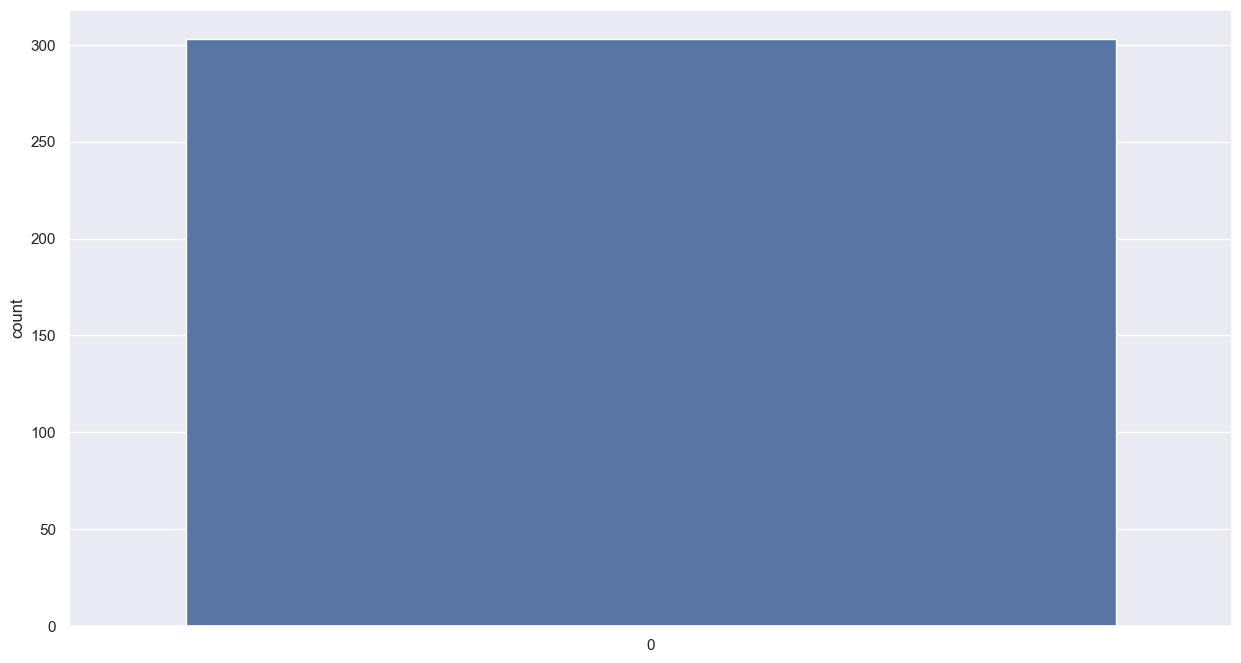

In [140]:
y = dataset["target"]

sns.countplot(y)

In [141]:
target_temp = dataset.target.value_counts()

print(target_temp)

1    165
0    138
Name: target, dtype: int64


In [142]:
print("Percentage of patients without heart problems: "+str(round(target_temp[0]*100/303,2)))
print("Percentage of patients with heart problems: "+str(round(target_temp[1]*100/303,2)))

Percentage of patients without heart problems: 45.54
Percentage of patients with heart problems: 54.46


### We'll analyse 'sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca' and 'thal' features

### Analysing the 'Sex' feature

In [143]:
dataset["sex"].unique()

array([1, 0], dtype=int64)

In [144]:
gender_temp = dataset.sex.value_counts()

print(gender_temp)

1    207
0     96
Name: sex, dtype: int64


##### We notice, that as expected, the 'sex' feature has 2 unique features

<AxesSubplot: xlabel='sex', ylabel='target'>

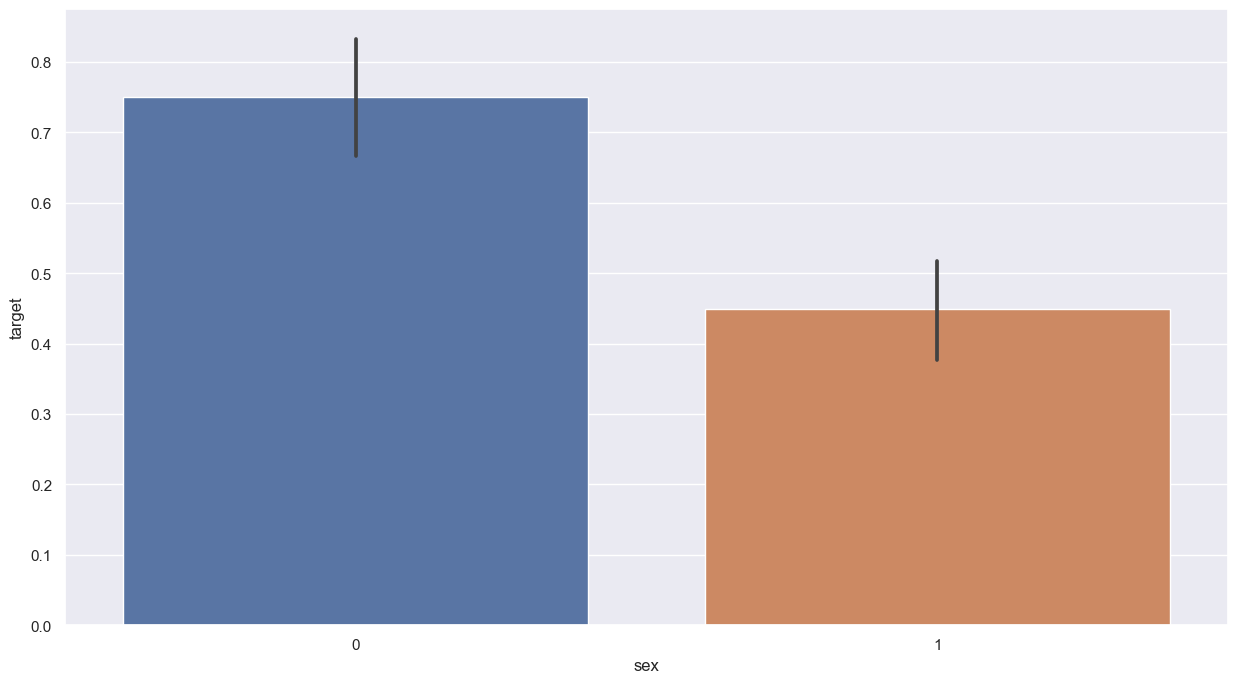

In [145]:
sns.barplot(x = dataset["sex"],y = y)

##### We notice, that females are more likely to have heart problems than males

### Analysing the 'Chest Pain Type' feature

In [147]:
dataset["cp"].unique()

array([3, 2, 1, 0], dtype=int64)

##### As expected, the CP feature has values from 0 to 3

<AxesSubplot: xlabel='cp', ylabel='target'>

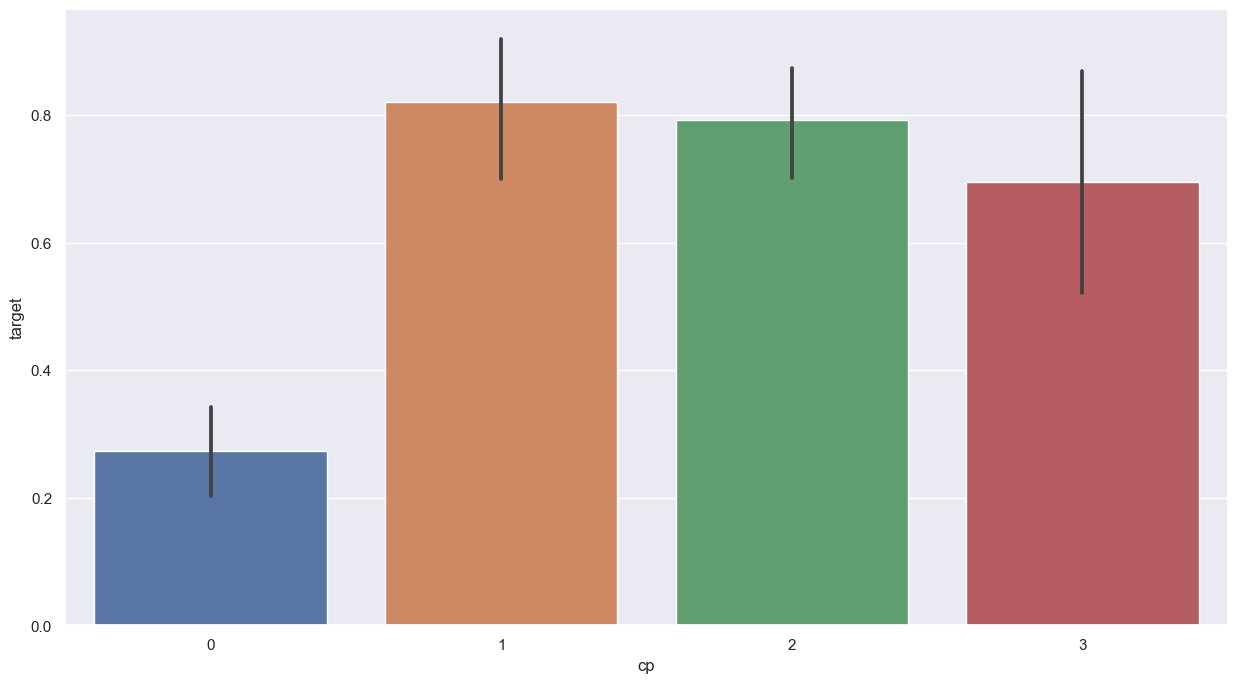

In [148]:
sns.barplot(x = dataset["cp"],y = y)

##### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

### Analysing the FBS feature

In [149]:
dataset["fbs"].describe()

count    303.000000
mean       0.148515
std        0.356198
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: fbs, dtype: float64

In [150]:
dataset["fbs"].unique()

array([1, 0], dtype=int64)

<AxesSubplot: xlabel='fbs', ylabel='target'>

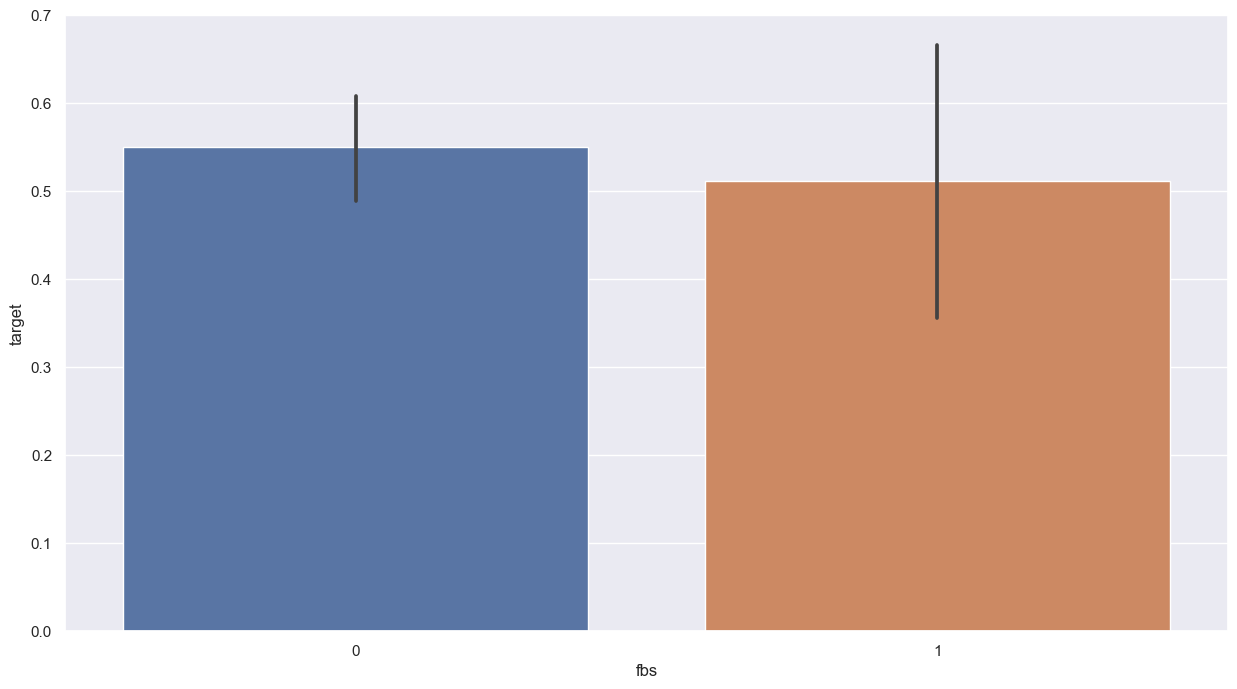

In [151]:
sns.barplot(x = dataset["fbs"],y = y)

##### Nothing extraordinary here

### Analysing the restecg feature

In [152]:
dataset["restecg"].unique()

array([0, 1, 2], dtype=int64)

<AxesSubplot: xlabel='restecg', ylabel='target'>

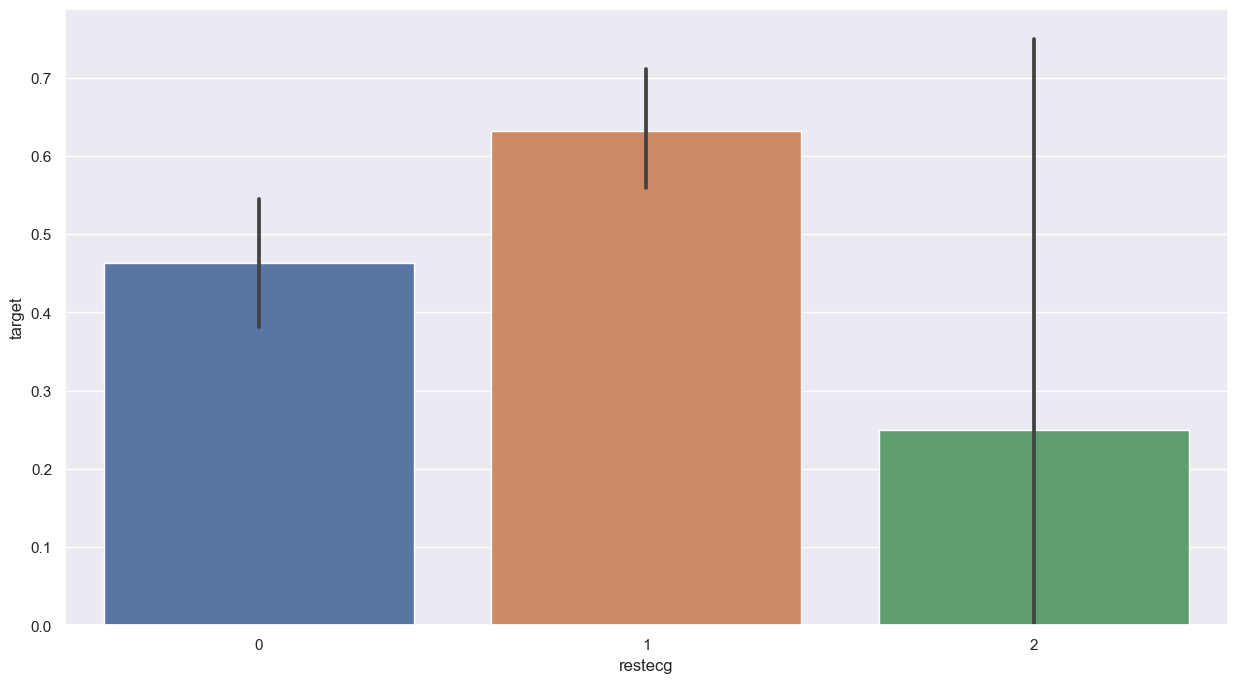

In [153]:
sns.barplot(x = dataset["restecg"],y = y)

##### We realize that people with restecg '1' and '0' are much more likely to have a heart disease than with restecg '2'

### Analysing the 'exang' feature

In [154]:
dataset["exang"].unique()

array([0, 1], dtype=int64)

<AxesSubplot: xlabel='exang', ylabel='target'>

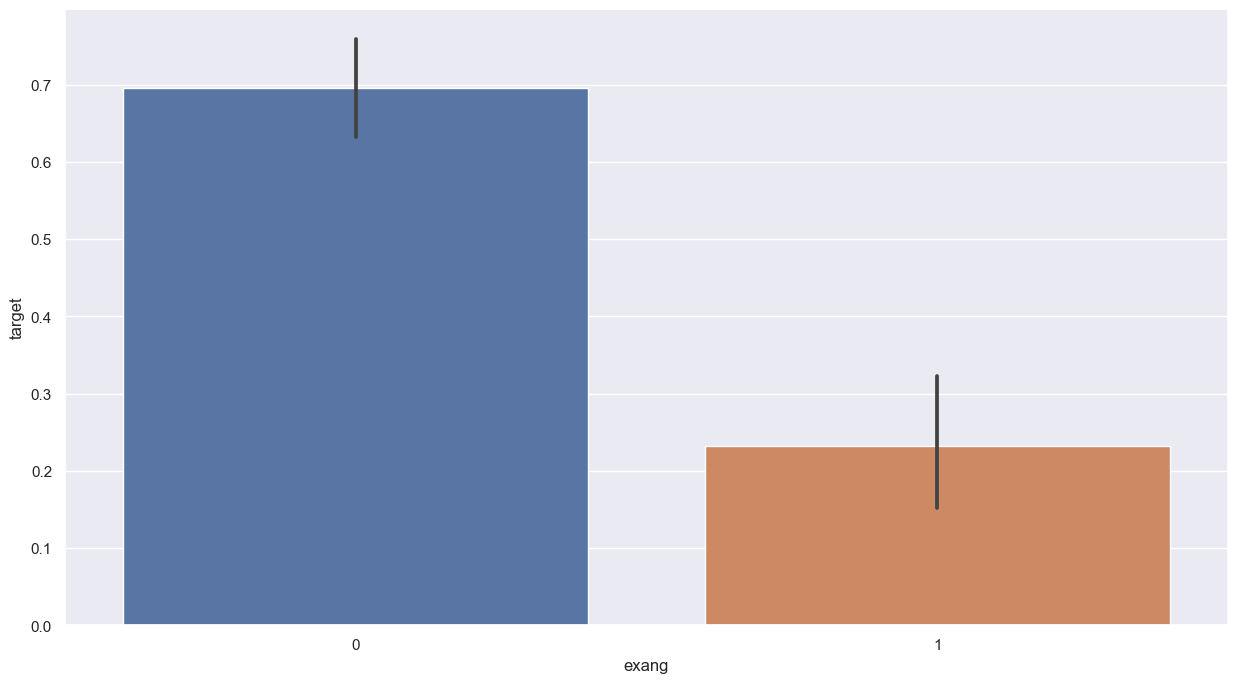

In [155]:
sns.barplot(x = dataset["exang"],y = y)

##### People with exang=1 i.e. Exercise induced angina are much less likely to have heart problems

### Analysing the Slope feature

In [156]:
dataset["slope"].unique()

array([0, 2, 1], dtype=int64)

<AxesSubplot: xlabel='slope', ylabel='target'>

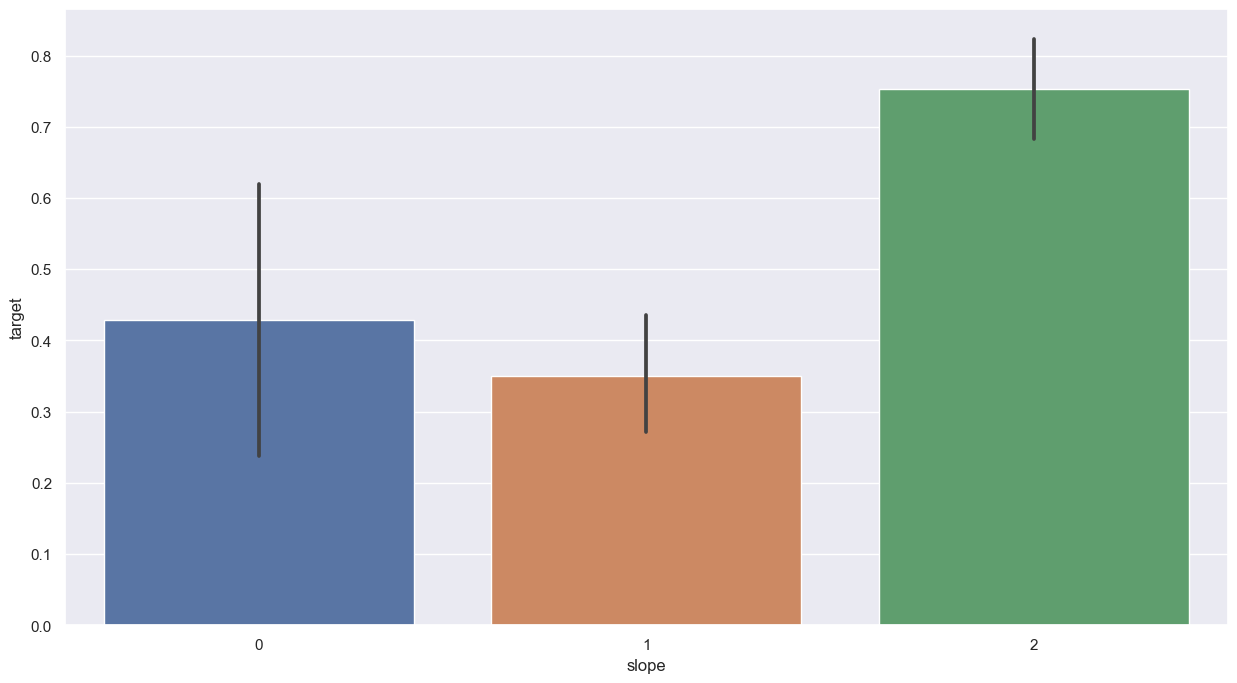

In [157]:
sns.barplot(x = dataset["slope"],y = y)

##### We observe, that Slope '2' causes heart pain much more than Slope '0' and '1'

### Analysing the 'ca' feature

In [158]:
#number of major vessels (0-3) colored by flourosopy

In [159]:
dataset["ca"].unique()

array([0, 2, 1, 3, 4], dtype=int64)

<AxesSubplot: xlabel='ca', ylabel='target'>

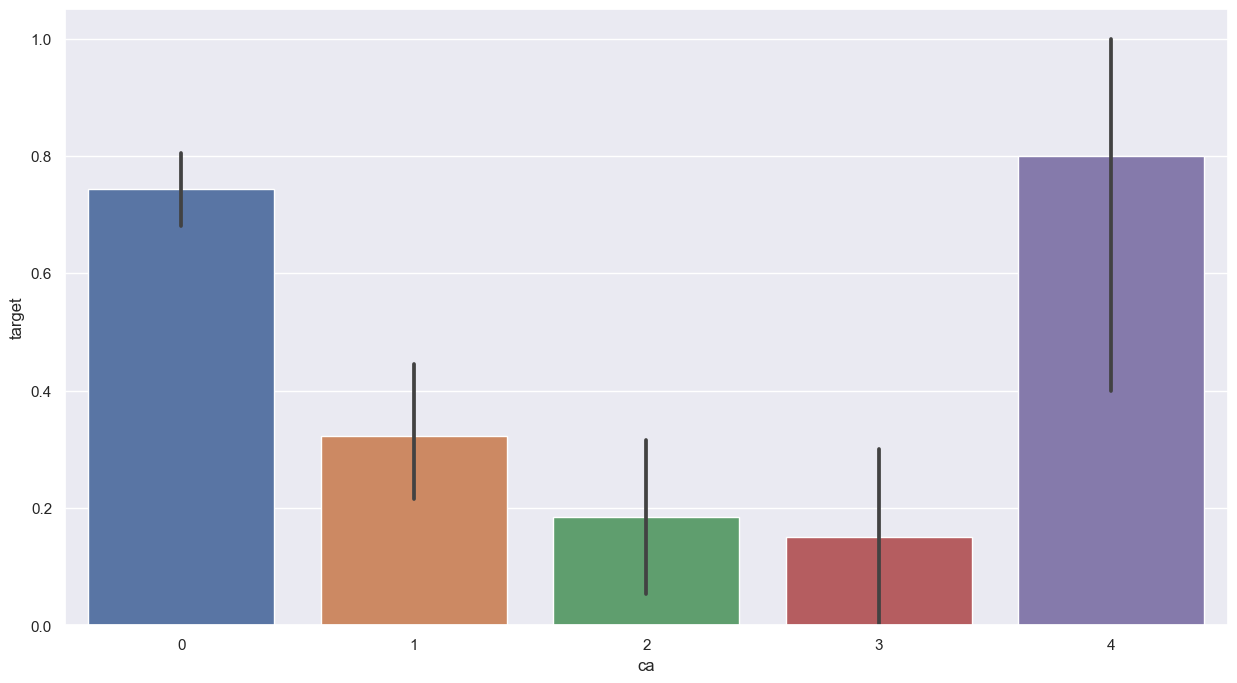

In [160]:
sns.barplot(x = dataset["ca"],y = y)

##### ca=4 has astonishingly large number of heart patients

In [161]:
### Analysing the 'thal' feature

In [162]:
dataset["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

<AxesSubplot: xlabel='thal', ylabel='target'>

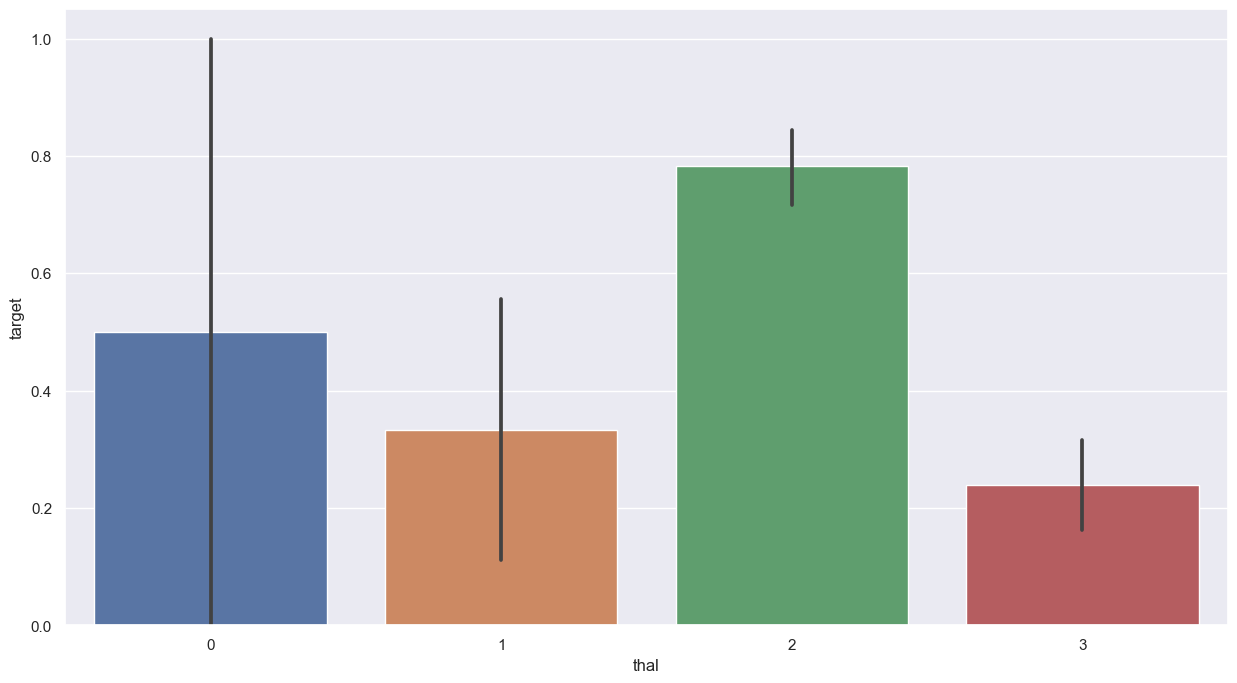

In [163]:
sns.barplot(x= dataset["thal"],y = y)

## IV. Train Test split

In [164]:
from sklearn.model_selection import train_test_split

predictors = dataset.drop("target",axis=1)
target = dataset["target"]

X_train,X_test,Y_train,Y_test = train_test_split(predictors,target,test_size=0.20,random_state=42)

In [165]:
X_train.shape

(242, 13)

In [166]:
X_test.shape

(61, 13)

In [167]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [168]:
Y_train.shape

(242,)

In [169]:
Y_test.shape

(61,)

## V. Model Fitting

In [170]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [171]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

In [172]:
Y_pred_lr.shape

(61,)

In [173]:
import pickle

In [174]:
with open('model_pkl', 'wb') as files:
    pickle.dump(lr,files)

In [175]:
with open('model_pkl','rb') as f:
    lr = pickle.load(f)

In [176]:
Y_pred_lr1 = lr.predict(X_test)

In [177]:
score_lr = round(accuracy_score(Y_pred_lr1,Y_test)*100,2)

print("The accuracy score achieved using Logistic Regression is: "+str(score_lr)+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %


### Naive Bayes

In [178]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,Y_train)

Y_pred_nb = nb.predict(X_test)

In [179]:
Y_pred_nb.shape

(61,)

In [180]:
score_nb = round(accuracy_score(Y_pred_nb,Y_test)*100,2)

print("The accuracy score achieved using Naive Bayes is: "+str(score_nb)+" %")

The accuracy score achieved using Naive Bayes is: 86.89 %


### SVM

In [181]:
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, Y_train)

Y_pred_svm = sv.predict(X_test)

In [182]:
Y_pred_svm.shape

(61,)

In [183]:
score_svm = round(accuracy_score(Y_pred_svm,Y_test)*100,2)

print("The accuracy score achieved using Linear SVM is: "+str(score_svm)+" %")

The accuracy score achieved using Linear SVM is: 86.89 %


### K Nearest Neighbors

In [184]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)

In [185]:
Y_pred_knn.shape

(61,)

In [186]:
score_knn = round(accuracy_score(Y_pred_knn,Y_test)*100,2)

print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 70.49 %


### Decision Tree

In [187]:
from sklearn.tree import DecisionTreeClassifier

max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state=x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

In [188]:
print(Y_pred_dt.shape)

(61,)


In [189]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_dt)+" %")

The accuracy score achieved using Decision Tree is: 85.25 %


### Random Forest

In [190]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
#print(max_accuracy)
#print(best_x)

rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)

In [191]:
Y_pred_rf.shape

(61,)

In [192]:
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 88.52 %


### XGBoost

In [193]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, Y_train)

Y_pred_xgb = xgb_model.predict(X_test)

In [194]:
Y_pred_xgb.shape

(61,)

In [195]:
score_xgb = round(accuracy_score(Y_pred_xgb,Y_test)*100,2)

print("The accuracy score achieved using XGBoost is: "+str(score_xgb)+" %")

The accuracy score achieved using XGBoost is: 81.97 %


### Neural Network

In [196]:
from keras.models import Sequential
from keras.layers import Dense

In [197]:
# https://stats.stackexchange.com/a/136542 helped a lot in avoiding overfitting

model = Sequential()
model.add(Dense(11,activation='relu',input_dim=13))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [198]:
model.fit(X_train,Y_train,epochs=300)

Epoch 1/300
8/8 [==============================] - 2s 6ms/step - loss: 73.6416 - accuracy: 0.4504
Epoch 2/300
8/8 [==============================] - 0s 6ms/step - loss: 65.6561 - accuracy: 0.4504
Epoch 3/300
8/8 [==============================] - 0s 5ms/step - loss: 58.0643 - accuracy: 0.4504
Epoch 4/300
8/8 [==============================] - 0s 8ms/step - loss: 50.1969 - accuracy: 0.4504
Epoch 5/300
8/8 [==============================] - 0s 4ms/step - loss: 42.0374 - accuracy: 0.4504
Epoch 6/300
8/8 [==============================] - 0s 6ms/step - loss: 34.3821 - accuracy: 0.4504
Epoch 7/300
8/8 [==============================] - 0s 6ms/step - loss: 26.0740 - accuracy: 0.4504
Epoch 8/300
8/8 [==============================] - 0s 5ms/step - loss: 18.4296 - accuracy: 0.4504
Epoch 9/300
8/8 [==============================] - 0s 5ms/step - loss: 11.0179 - accuracy: 0.4917
Epoch 10/300
8/8 [==============================] - 0s 5ms/step - loss: 6.9770 - accuracy: 0.5702
Epoch 11/300
8/8 [==

8/8 [==============================] - 0s 5ms/step - loss: 0.6240 - accuracy: 0.7273
Epoch 85/300
8/8 [==============================] - 0s 4ms/step - loss: 0.6131 - accuracy: 0.7479
Epoch 86/300
8/8 [==============================] - 0s 4ms/step - loss: 0.5994 - accuracy: 0.7562
Epoch 87/300
8/8 [==============================] - 0s 4ms/step - loss: 0.5948 - accuracy: 0.7603
Epoch 88/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5852 - accuracy: 0.7603
Epoch 89/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5868 - accuracy: 0.7562
Epoch 90/300
8/8 [==============================] - 0s 4ms/step - loss: 0.5736 - accuracy: 0.7686
Epoch 91/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5663 - accuracy: 0.7769
Epoch 92/300
8/8 [==============================] - 0s 5ms/step - loss: 0.5695 - accuracy: 0.7562
Epoch 93/300
8/8 [==============================] - 0s 6ms/step - loss: 0.5569 - accuracy: 0.7893
Epoch 94/300
8/8 [===============

8/8 [==============================] - 0s 6ms/step - loss: 0.4078 - accuracy: 0.8182
Epoch 168/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4122 - accuracy: 0.8182
Epoch 169/300
8/8 [==============================] - 0s 5ms/step - loss: 0.4199 - accuracy: 0.7934
Epoch 170/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4282 - accuracy: 0.7934
Epoch 171/300
8/8 [==============================] - 0s 4ms/step - loss: 0.4275 - accuracy: 0.7934
Epoch 172/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3959 - accuracy: 0.8430
Epoch 173/300
8/8 [==============================] - 0s 6ms/step - loss: 0.4041 - accuracy: 0.8264
Epoch 174/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3886 - accuracy: 0.8388
Epoch 175/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3923 - accuracy: 0.8264
Epoch 176/300
8/8 [==============================] - 0s 6ms/step - loss: 0.3949 - accuracy: 0.8264
Epoch 177/300
8/8 [=====

8/8 [==============================] - 0s 5ms/step - loss: 0.3708 - accuracy: 0.8595
Epoch 250/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3714 - accuracy: 0.8388
Epoch 251/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3702 - accuracy: 0.8595
Epoch 252/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3709 - accuracy: 0.8471
Epoch 253/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3707 - accuracy: 0.8512
Epoch 254/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3757 - accuracy: 0.8347
Epoch 255/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3850 - accuracy: 0.8182
Epoch 256/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3746 - accuracy: 0.8430
Epoch 257/300
8/8 [==============================] - 0s 4ms/step - loss: 0.3762 - accuracy: 0.8554
Epoch 258/300
8/8 [==============================] - 0s 5ms/step - loss: 0.3870 - accuracy: 0.8223
Epoch 259/300
8/8 [=====

In [199]:
Y_pred_nn = model.predict(X_test)

2/2 [==============================] - 0s 10ms/step


In [200]:
Y_pred_nn.shape

(61, 1)

In [201]:
rounded = [round(x[0]) for x in Y_pred_nn]

Y_pred_nn = rounded

In [202]:
score_nn = round(accuracy_score(Y_pred_nn,Y_test)*100,2)

print("The accuracy score achieved using Neural Network is: "+str(score_nn)+" %")

#Note: Accuracy of 85% can be achieved on the test set, by setting epochs=2000, and number of nodes = 11. 

The accuracy score achieved using Neural Network is: 85.25 %


## VI. Output final score

In [203]:
scores = [score_lr,score_nb,score_svm,score_knn,score_dt,score_rf,score_xgb,score_nn]
algorithms = ["Logistic Regression","Naive Bayes","Support Vector Machine","K-Nearest Neighbors","Decision Tree","Random Forest","XGBoost","Neural Network"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 88.52 %
The accuracy score achieved using Naive Bayes is: 86.89 %
The accuracy score achieved using Support Vector Machine is: 86.89 %
The accuracy score achieved using K-Nearest Neighbors is: 70.49 %
The accuracy score achieved using Decision Tree is: 85.25 %
The accuracy score achieved using Random Forest is: 88.52 %
The accuracy score achieved using XGBoost is: 81.97 %
The accuracy score achieved using Neural Network is: 85.25 %


<AxesSubplot: xlabel='Algorithms', ylabel='Accuracy score'>

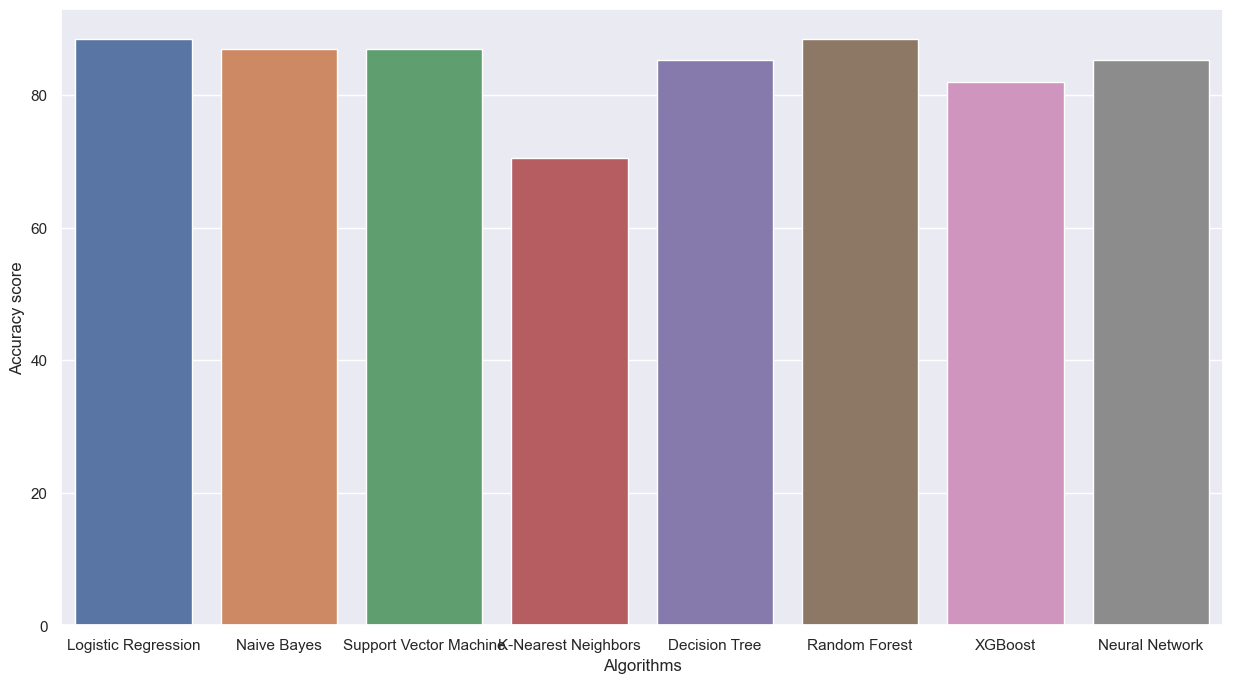

In [204]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x = algorithms,y = scores)

###there random forest has good result as compare to other algorithms <br> <br>